# Use decision trees to prepare a model on ' fraud data '
    treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

    Data Description :

    Undergrad : person is under graduated or not
    Marital.Status : marital status of a person
    Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
    Work Experience : Work experience of an individual person
    Urban : Whether that person belongs to urban area or not

## import Data

In [102]:
import pandas as pd

In [103]:
income_data = pd.read_csv('Fraud_check.csv')
income_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


## Data Understanding

In [104]:
income_data.shape

(600, 6)

In [105]:
income_data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [106]:
income_data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

## Data Preparation

#### treating those who have taxable_income <= 30000 as "Risky" and others are "Good" 

In [107]:
income_data['Inc_Conc'] = income_data['Taxable.Income'].apply(lambda x: 'Risky' if x<=30000 else 'Good')
income_data.head(15)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Inc_Conc
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
5,NO,Divorced,33329,116382,0,NO,Good
6,NO,Divorced,83357,80890,8,YES,Good
7,YES,Single,62774,131253,3,YES,Good
8,NO,Single,83519,102481,12,YES,Good
9,YES,Divorced,98152,155482,4,YES,Good


In [108]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for columns_name in income_data.columns:
    if income_data[columns_name].dtypes == object:
        income_data[columns_name] = le.fit_transform(income_data[columns_name])
    else:
        pass
income_data.head(15)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Inc_Conc
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
5,0,0,33329,116382,0,0,0
6,0,0,83357,80890,8,1,0
7,1,2,62774,131253,3,1,0
8,0,2,83519,102481,12,1,0
9,1,0,98152,155482,4,1,0


In [109]:
def norm_func(i):
    x = (i - i.min())/(i.max()-i.min())
    return(x)

In [110]:
scaled_data = norm_func(income_data.iloc[:, 0:])
scaled_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Inc_Conc
0,0.0,1.0,0.656468,0.139472,0.333333,1.0,0.0
1,1.0,0.0,0.264428,0.622394,0.600000,1.0,0.0
2,0.0,0.5,0.300415,0.772568,1.000000,1.0,0.0
3,1.0,1.0,0.448436,0.962563,0.500000,1.0,0.0
4,0.0,0.5,0.792258,0.010081,0.933333,0.0,0.0
...,...,...,...,...,...,...,...
595,1.0,0.0,0.740236,0.078811,0.233333,1.0,0.0
596,1.0,0.0,0.669122,0.170058,0.066667,1.0,0.0
597,0.0,0.0,0.416566,0.737240,0.000000,1.0,0.0
598,1.0,0.5,0.988540,0.886810,0.566667,0.0,0.0


In [111]:
x = scaled_data.drop(labels='Inc_Conc',axis=1)
y = scaled_data[['Inc_Conc']]

In [112]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=44)

## Model Building | Model Training

In [113]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_model = dt.fit(x_train,y_train)

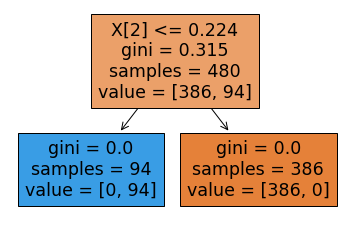

In [114]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
plot_tree(dt_model, filled=True)
plt.show()

## Model Testing

In [115]:
y_pred = dt_model.predict(x_test)
pd.Series(y_pred).value_counts()

0.0    90
1.0    30
dtype: int64

## Model Evaluation

In [116]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,confusion_matrix
print('Accuracy Score    : ',accuracy_score(y_test,y_pred))
print('Precision Score   : ',precision_score(y_test,y_pred))
print('Recall Score      : ',recall_score(y_test,y_pred))
print('roc_auc_score     :',roc_auc_score(y_test,y_pred))
print('Confussion Matrix :\n ',confusion_matrix(y_test,y_pred))

Accuracy Score    :  1.0
Precision Score   :  1.0
Recall Score      :  1.0
roc_auc_score     : 1.0
Confussion Matrix :
  [[90  0]
 [ 0 30]]


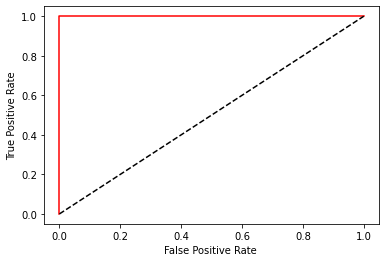

In [117]:
from sklearn.metrics import roc_curve,roc_auc_score
from matplotlib import pyplot as plt
# roc_score=roc_auc_score(y_test,y_pred)
# print(roc_score)
# roc_curve
fpr, tpr, thresholds = roc_curve(y,dt.predict_proba(x)[:,1])
plt.plot(fpr, tpr, color='red',)# label='dt(area = %0.2f)'%auc)
plt.plot([0, 1], 'k--')
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate')
plt.show()

### Decision Tree Classifier using Entropy

In [90]:
dt_model_1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt_model_1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

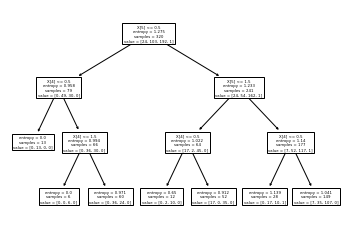

In [91]:
from sklearn import tree
tree.plot_tree(dt_model_1)
plt.show()

In [92]:
y_pred_en = dt_model_1.predict(x_test)
pd.Series(y_pred_en).value_counts()

2    56
1    24
dtype: int64

In [23]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,confusion_matrix
print('Accuracy Score    : ',accuracy_score(y_test,y_pred_en))
print('Precision Score   : ',precision_score(y_test,y_pred_en))
print('Recall Score      : ',recall_score(y_test,y_pred_en))
print('roc_auc_score     :',roc_auc_score(y_test,y_pred_en))
print('Confussion Matrix :\n ',confusion_matrix(y_test,y_pred_en))

Accuracy Score    :  1.0
Precision Score   :  1.0
Recall Score      :  1.0
roc_auc_score     : 1.0
Confussion Matrix :
  [[90  0]
 [ 0 30]]


## Decision Tree using Gini Index

In [85]:
dt_model_2 = DecisionTreeClassifier(criterion = 'gini',max_depth=3)
dt_model_2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

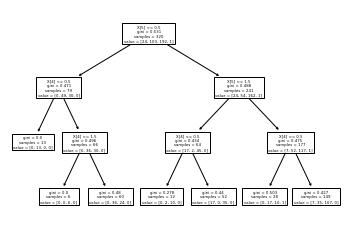

In [86]:
plot_tree(dt_model_2)
plt.show()

In [88]:
y_pred_gi = dt_model_2.predict(x_test)
pd.Series(y_pred_gi).value_counts()

2    56
1    24
dtype: int64

In [27]:
print('Accuracy Score    : ',accuracy_score(y_test,y_pred_gi))
print('Precision Score   : ',precision_score(y_test,y_pred_gi))
print('Recall Score      : ',recall_score(y_test,y_pred_gi))
print('roc_auc_score     :',roc_auc_score(y_test,y_pred_gi))
print('Confussion Matrix :\n ',confusion_matrix(y_test,y_pred_gi))

Accuracy Score    :  1.0
Precision Score   :  1.0
Recall Score      :  1.0
roc_auc_score     : 1.0
Confussion Matrix :
  [[90  0]
 [ 0 30]]


## ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Use decision trees to prepare a model on ' company data '
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
* Sales -- Unit sales (in thousands) at each location
* Competitor Price -- Price charged by competitor at each location
* Income -- Community income level (in thousands of dollars)
* Advertising -- Local advertising budget for company at each location (in thousands of dollars)
* Population -- Population size in region (in thousands)
* Price -- Price company charges for car seats at each site
* Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location           for the car seats at each site
* Age -- Average age of the local population
* Education -- Education level at each location
* Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
* US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 

Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) &           all other variable will be independent in the analysis.  

In [28]:
sales_data = pd.read_csv('Company_Data.csv')
sales_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## Initial Analysis

In [29]:
sales_data.shape

(400, 11)

In [30]:
sales_data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [31]:
sales_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [32]:
sales_data.describe(include='all')

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400.000000,400.000000,400,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Medium,NaN,NaN,Yes,Yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,219,NaN,NaN,282,258
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,NaN,53.322500,13.900000,NaN,NaN
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,NaN,16.200297,2.620528,NaN,NaN
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,NaN,25.000000,10.000000,NaN,NaN
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,NaN,39.750000,12.000000,NaN,NaN
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,NaN,54.500000,14.000000,NaN,NaN
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,NaN,66.000000,16.000000,NaN,NaN


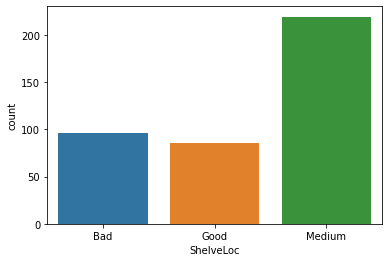

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64


In [33]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from matplotlib import pyplot as plt
sns.countplot(sales_data['ShelveLoc'])
plt.show()
print(sales_data['ShelveLoc'].value_counts())

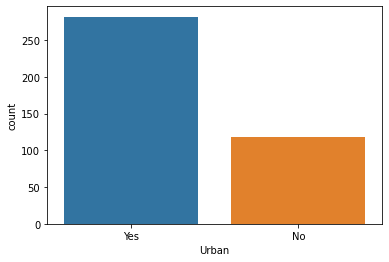

Yes    282
No     118
Name: Urban, dtype: int64


In [34]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from matplotlib import pyplot as plt
sns.countplot(sales_data['Urban'])
plt.show()
print(sales_data['Urban'].value_counts())

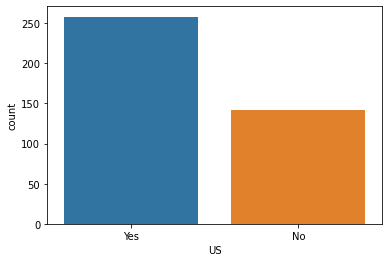

Yes    258
No     142
Name: US, dtype: int64


In [35]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from matplotlib import pyplot as plt
sns.countplot(sales_data['US'])
plt.show()
print(sales_data['US'].value_counts())

## Data Preparation

###  First convert target data(Sales) into categorical variable.

In [36]:
sales_data['Sales']       = pd.cut(x=sales_data['Sales'],bins=[0, 6, 12, 17], labels=['Low','Medium', 'High']) 

sales_data['CompPrice']   = pd.cut(x=sales_data['CompPrice'],bins=[77, 100, 133, 176], labels=['Low','Medium', 'High'])

sales_data['Income']      = pd.cut(x=sales_data['Income'],bins=[21, 46, 71, 121], labels=['Low','Medium', 'High'])

sales_data['Advertising'] = pd.cut(x=sales_data['Advertising'],bins=[0, 10, 20, 30], labels=['Low','Medium', 'High'])

sales_data['Population']  = pd.cut(x=sales_data['Population'],bins=[10, 170, 340, 510], labels=['Low','Medium', 'High'])

sales_data['Price']       = pd.cut(x=sales_data['Price'],bins=[24, 80, 136, 192], labels=['Low','Medium', 'High'])

sales_data['Age']         = pd.cut(x=sales_data['Age'],bins=[25, 45, 60, 81], labels=['Low','Medium', 'High'])

sales_data['Education']   = pd.cut(x=sales_data['Education'],bins=[10, 12.5, 15, 19], labels=['Low','Medium', 'High'])
sales_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,High,High,Medium,Medium,Medium,Bad,Low,High,Yes,Yes
1,Medium,Medium,Medium,Medium,Medium,Medium,Good,High,NaN,Yes,Yes
2,Medium,Medium,Low,Low,Medium,Low,Medium,Medium,Low,Yes,Yes
3,Medium,Medium,High,Low,High,Medium,Medium,Medium,Medium,Yes,Yes
4,Low,High,Medium,Low,Medium,Medium,Bad,Low,Medium,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,High,High,Medium,Medium,Medium,Good,Low,Medium,Yes,Yes
396,Medium,High,Low,Low,Low,Medium,Medium,Medium,Low,No,Yes
397,Medium,High,Low,Medium,High,High,Medium,Low,High,Yes,Yes
398,Low,Low,High,Low,Medium,Medium,Bad,Medium,Low,Yes,Yes


In [37]:
sales_data.dtypes

Sales          category
CompPrice      category
Income         category
Advertising    category
Population     category
Price          category
ShelveLoc        object
Age            category
Education      category
Urban            object
US               object
dtype: object

In [38]:
#Label Encoding
sales_data['Sales']=le.fit_transform(sales_data['Sales'])
sales_data['CompPrice']=le.fit_transform(sales_data['CompPrice'])
sales_data['Income']=le.fit_transform(sales_data['Income'])
sales_data['Advertising']=le.fit_transform(sales_data['Advertising'])
sales_data['Population']=le.fit_transform(sales_data['Population'])
sales_data['Price']=le.fit_transform(sales_data['Price'])
sales_data['ShelveLoc']=le.fit_transform(sales_data['ShelveLoc'])
sales_data['Age']=le.fit_transform(sales_data['Age'])
sales_data['Education']=le.fit_transform(sales_data['Education'])
sales_data['Urban']=le.fit_transform(sales_data['Urban'])
sales_data['US']=le.fit_transform(sales_data['US'])
sales_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,0,0,2,2,2,0,1,0,1,1
1,2,2,2,2,2,2,1,0,3,1,1
2,2,2,1,1,2,1,2,2,1,1,1
3,2,2,0,1,0,2,2,2,2,1,1
4,1,0,2,1,2,2,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,2,2,2,1,1,2,1,1
396,2,0,1,1,1,2,2,2,1,0,1
397,2,0,1,2,0,0,2,1,0,1,1
398,1,1,0,1,2,2,0,2,1,1,1


In [39]:
x = sales_data.drop('Sales',axis=1)
y = sales_data[['Sales']]

In [40]:
# def norm_func(i):
#     x = (i-i.min())/(i.max()-i.min())        
#     return(x)
# scaled_data = norm_func(sales_data.iloc[:,0:])
# scaled_data

In [41]:
# x = scaled_data.drop(labels='Sales',axis=1)
# y = scaled_data[['Sales']]

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=12,)

## Model Building | Model Traning

### Decision Tree

In [43]:
dtm_4 = DecisionTreeClassifier()
dt_model_4 = dtm_4.fit(x_train,y_train)
dt_model_4

DecisionTreeClassifier()

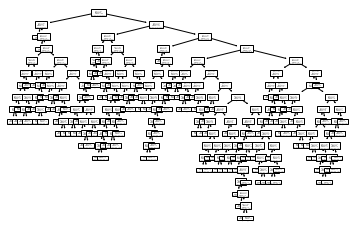

In [44]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
plot_tree(dt_model_4)
plt.show()

## Model Testing

In [80]:
y_pred_4 = dt_model_4.predict(x_test)
pd.Series(y_pred_4).value_counts()

2    56
1    20
0     4
dtype: int64

## Model Evaluation

In [46]:
print('Accuracy Score    : ',accuracy_score(y_test,y_pred_4))

Accuracy Score    :  0.6625


### Pruning of tree using Entropy

In [50]:
dtm_5 = DecisionTreeClassifier(criterion='entropy',max_depth=3)
dt_model_5 = dtm_5.fit(x_train,y_train)
dt_model_5

DecisionTreeClassifier(criterion='entropy', max_depth=3)

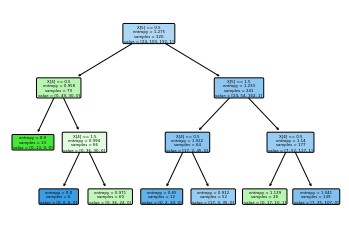

In [51]:
plot_tree(dt_model_5,filled=True, rounded=True,)
plt.show()

In [79]:
y_pred_e = dt_model_5.predict(x_test)
pd.Series(y_pred_e).value_counts()

2    56
1    24
dtype: int64

In [53]:
print('Accuracy Score    : ',accuracy_score(y_test,y_pred_e))

Accuracy Score    :  0.7625


### pruning of tree using gini index

In [54]:
dtm_6 = DecisionTreeClassifier(criterion='gini',max_depth=3)
dt_model_6 = dtm_6.fit(x_train,y_train)
dt_model_6

DecisionTreeClassifier(max_depth=3)

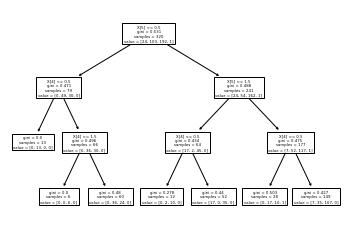

In [55]:
tree.plot_tree(dt_model_6);
plt.show()

In [78]:
y_pred_g = dt_model_6.predict(x_test)
pd.Series(y_pred_g).value_counts()

2    56
1    24
dtype: int64

In [57]:
print('Accuracy Score : ', accuracy_score(y_test,y_pred_g))

Accuracy Score :  0.7625


### Pruning of tree using Grid Search CV

In [70]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = dt_model_4,param_grid = {'max_depth' : [2,4,5,6,7,8], 'criterion': ['gini','entropy']},cv=5,)
md=grid_search.fit(x_train,y_train)
md

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 5, 6, 7, 8]})

In [73]:
md.best_params_

{'criterion': 'entropy', 'max_depth': 7}

In [74]:
md.best_score_

0.684375

In [77]:
y_pred=md.predict(x_test)
pd.Series(y_pred).value_counts()

2    51
1    23
0     5
3     1
dtype: int64